In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define function g(x) = (x1 + 49)^2 + (x2 - 36)^2
def g(x):
    return (x[0] + 49) ** 2 + (x[1] - 36) ** 2

# Gradient of g(x)
def grad_g(x):
    return np.array([2 * (x[0] + 49), 2 * (x[1] - 36)])

# Backtracking line search function
def backtracking_line_search(x, p, alpha0, rho=0.5, gamma=0.5):
    alpha = alpha0
    while g(x + alpha * p) > g(x) + gamma * alpha * np.dot(grad_g(x), p):
        alpha *= rho
    return alpha

def line_search_g(x, grad):
    num = np.dot(grad, grad)
    denom = 2 * (grad[0] ** 2 + grad[1] ** 2)
    return num / denom

# Gradient Descent with Backtracking Line Search
def gradient_descent_backtracking(x0, tau, alpha0, rho=0.5, gamma=0.5):
    x = x0
    iterations = 0
    trajectory = [x0]
    
    while np.linalg.norm(grad_g(x)) > tau:
        grad = grad_g(x)
        p = -grad
        alpha = backtracking_line_search(x, p, alpha0, rho, gamma)
        x = x + alpha * p
        trajectory.append(x)
        iterations += 1
    
    return x, g(x), iterations, trajectory

# Gradient Descent with Exact Line Search
def gradient_descent_exact_line_search(x0, tau):
    x = x0
    iterations = 0
    trajectory = [x0]
    
    while np.linalg.norm(grad_g(x)) > tau:
        grad = grad_g(x)
        alpha = line_search_g(x, grad_g(x))
        x = x - alpha * grad
        trajectory.append(x)
        iterations += 1
    
    return x, g(x), iterations, trajectory


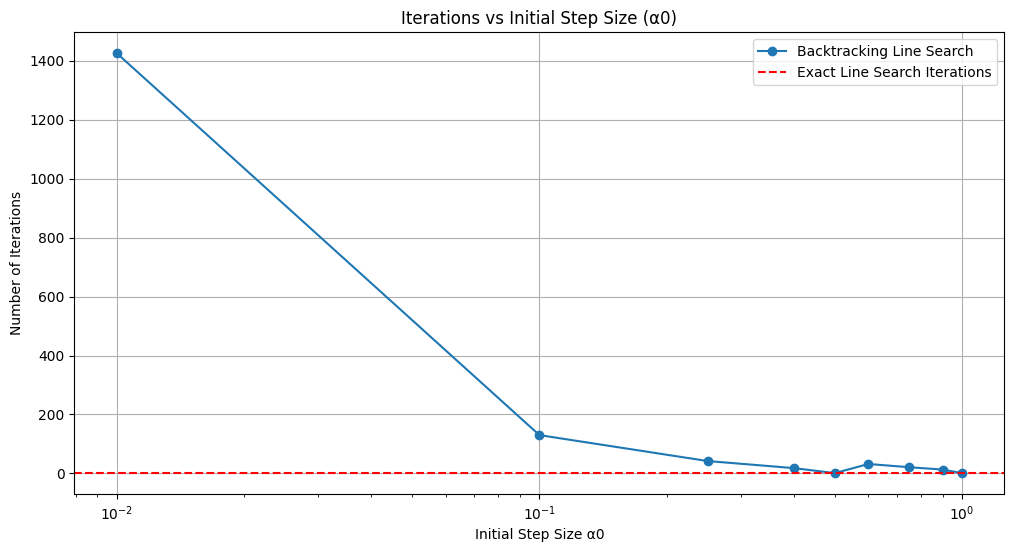

In [5]:

# Parameters
x0 = np.array([100, 100])  # Starting point
tau = 1e-10  # Stopping tolerance
alpha0_values = [1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]  # Initial step sizes

# Results storage
backtracking_results = []

for alpha0 in alpha0_values:
    x_final, f_final, iterations, trajectory = gradient_descent_backtracking(x0, tau, alpha0)
    backtracking_results.append((alpha0, x_final, f_final, iterations, trajectory))

# Perform Gradient Descent with Exact Line Search
exact_x_final, exact_f_final, exact_iterations, exact_trajectory = gradient_descent_exact_line_search(x0, tau)

# Plot: Number of Iterations vs α0
alpha0_vals, _, _, iter_counts, _ = zip(*backtracking_results)

plt.figure(figsize=(12, 6))
plt.plot(alpha0_vals, iter_counts, label="Backtracking Line Search", marker='o')
plt.axhline(y=exact_iterations, color='r', linestyle='--', label="Exact Line Search Iterations")
plt.xlabel("Initial Step Size α0")
plt.ylabel("Number of Iterations")
plt.title("Iterations vs Initial Step Size (α0)")
plt.xscale("log")
plt.legend()
plt.grid()
plt.show()


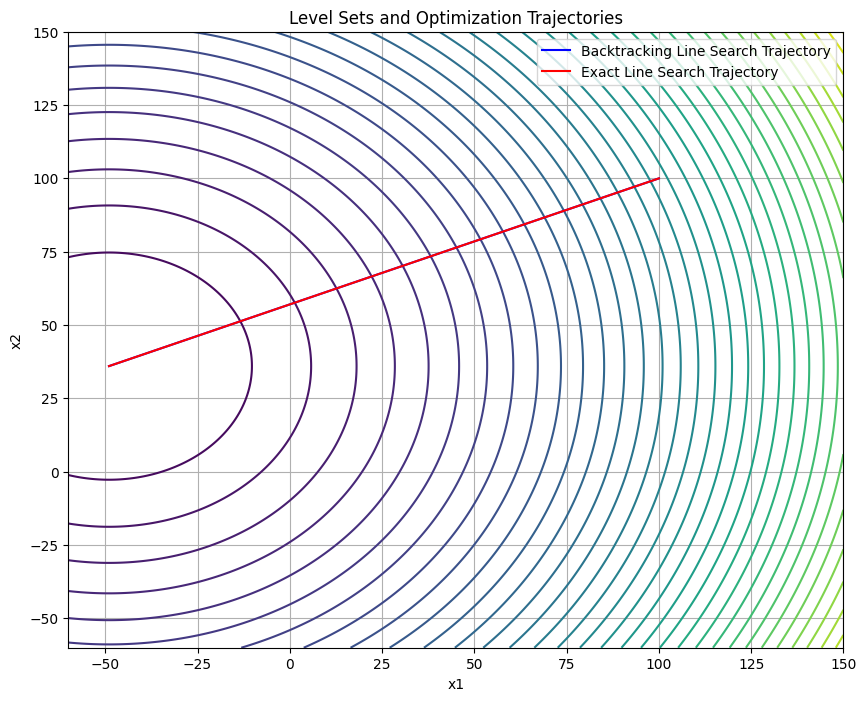

Exact Line Search:
Final minimizer: [-49.  36.]
Objective function value: 0.0
Number of iterations: 1

Backtracking Line Search Results:
α0 = 1: Minimizer = [-49.  36.], Objective = 0.0, Iterations = 1
α0 = 0.9: Minimizer = [-49.  36.], Objective = 2.629978954295262e-22, Iterations = 13
α0 = 0.75: Minimizer = [-49.  36.], Objective = 1.3595230355191855e-21, Iterations = 21
α0 = 0.6: Minimizer = [-49.  36.], Objective = 8.948165620682675e-22, Iterations = 32
α0 = 0.5: Minimizer = [-49.  36.], Objective = 0.0, Iterations = 1
α0 = 0.4: Minimizer = [-49.  36.], Objective = 1.8070003829032932e-21, Iterations = 18
α0 = 0.25: Minimizer = [-49.  36.], Objective = 1.3595230355191855e-21, Iterations = 42
α0 = 0.1: Minimizer = [-49.  36.], Objective = 1.672152121111579e-21, Iterations = 130
α0 = 0.01: Minimizer = [-49.  36.], Objective = 2.4913093745480103e-21, Iterations = 1426


In [6]:

# Plot: Level sets and trajectories
x_vals = np.linspace(-60, 150, 400)
y_vals = np.linspace(-60, 150, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = (X + 49) ** 2 + (Y - 36) ** 2

plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=50, cmap='viridis')

# Plot Backtracking trajectory (for α0 = 0.75 as an example)
backtracking_trajectory = backtracking_results[2][-1]  # Example α0 = 0.75
traj = np.array(backtracking_trajectory)
plt.plot(traj[:, 0], traj[:, 1], label="Backtracking Line Search Trajectory", color="blue")

# Plot Exact Line Search trajectory
exact_traj = np.array(exact_trajectory)
plt.plot(exact_traj[:, 0], exact_traj[:, 1], label="Exact Line Search Trajectory", color="red")

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Level Sets and Optimization Trajectories")
plt.legend()
plt.grid()
plt.show()

# Observations
print("Exact Line Search:")
print(f"Final minimizer: {exact_x_final}")
print(f"Objective function value: {exact_f_final}")
print(f"Number of iterations: {exact_iterations}\n")

print("Backtracking Line Search Results:")
for alpha0, x_final, f_final, iterations, _ in backtracking_results:
    print(f"α0 = {alpha0}: Minimizer = {x_final}, Objective = {f_final}, Iterations = {iterations}")